In [35]:
pip install --upgrade scikit-learn imbalanced-learn


Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [36]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator, StrMethodFormatter
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, RobustScaler
from category_encoders import TargetEncoder
from imblearn.over_sampling import SMOTE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from imblearn.pipeline import Pipeline as ImbPipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import FunctionTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score, classification_report
import joblib




In [37]:
 
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")


# \***\*Exploratory Data Analysis (EDA)\*\***


In [38]:
train_data.head()

,user_id,REGION,TENURE,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,MRG,REGULARITY,TOP_PACK,FREQ_TOP_PACK,CHURN
0,00000bfd7d50f01092811bc0c8d7b0d6fe7c3596,FATICK,K > 24 month,4250.0,15.0,4251.0,1417.0,17.0,4.0,388.0,46.0,1.0,1.0,2.0,NO,54,On net 200F=Unlimited _call24H,8.0,0
1,00000cb4a5d760de88fecb38e2f71b7bec52e834,NaN,I 18-21 month,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NO,4,NaN,NaN,1
2,00001654a9d9f96303d9969d0a4a851714a4bb57,NaN,K > 24 month,3600.0,2.0,1020.0,340.0,2.0,NaN,90.0,46.0,7.0,NaN,NaN,NO,17,On-net 1000F=10MilF;10d,1.0,0
3,00001dd6fa45f7ba044bd5d84937be464ce78ac2,DAKAR,K > 24 month,13500.0,15.0,13502.0,4501.0,18.0,43804.0,41.0,102.0,2.0,NaN,NaN,NO,62,"Data:1000F=5GB,7d",11.0,0
4,000028d9e13a595abe061f9b58f3d76ab907850f,DAKAR,K > 24 month,1000.0,1.0,985.0,328.0,1.0,NaN,39.0,24.0,NaN,NaN,NaN,NO,11,Mixt 250F=Unlimited_call24H,2.0,0


In [39]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2154048 entries, 0 to 2154047
Data columns (total 19 columns):
 #   Column          Dtype  
---  ------          -----  
 0   user_id         object 
 1   REGION          object 
 2   TENURE          object 
 3   MONTANT         float64
 4   FREQUENCE_RECH  float64
 5   REVENUE         float64
 6   ARPU_SEGMENT    float64
 7   FREQUENCE       float64
 8   DATA_VOLUME     float64
 9   ON_NET          float64
 10  ORANGE          float64
 11  TIGO            float64
 12  ZONE1           float64
 13  ZONE2           float64
 14  MRG             object 
 15  REGULARITY      int64  
 16  TOP_PACK        object 
 17  FREQ_TOP_PACK   float64
 18  CHURN           int64  
dtypes: float64(12), int64(2), object(5)
memory usage: 312.2+ MB


In [40]:
train_data.describe()

,MONTANT,FREQUENCE_RECH,REVENUE,ARPU_SEGMENT,FREQUENCE,DATA_VOLUME,ON_NET,ORANGE,TIGO,ZONE1,ZONE2,REGULARITY,FREQ_TOP_PACK,CHURN
count,1.397309e+06,1.397309e+06,1.428000e+06,1.428000e+06,1.428000e+06,1.093615e+06,1.367373e+06,1.258800e+06,864032.000000,169721.000000,136824.000000,2.154048e+06,1.251454e+06,2.154048e+06
mean,5.532117e+03,1.152912e+01,5.510810e+03,1.836943e+03,1.397814e+01,3.366450e+03,2.776891e+02,9.541871e+01,23.109253,8.170132,7.553309,2.804251e+01,9.272461e+00,1.875474e-01
std,7.111339e+03,1.327407e+01,7.187113e+03,2.395700e+03,1.469403e+01,1.330446e+04,8.726889e+02,2.049873e+02,63.578086,41.169511,33.487234,2.228686e+01,1.228044e+01,3.903504e-01
min,1.000000e+01,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000e+00
25%,1.000000e+03,2.000000e+00,1.000000e+03,3.330000e+02,3.000000e+00,0.000000e+00,5.000000e+00,7.000000e+00,2.000000,0.000000,0.000000,6.000000e+00,2.000000e+00,0.000000e+00
50%,3.000000e+03,7.000000e+00,3.000000e+03,1.000000e+03,9.000000e+00,2.570000e+02,2.700000e+01,2.900000e+01,6.000000,1.000000,2.000000,2.400000e+01,5.000000e+00,0.000000e+00
75%,7.350000e+03,1.600000e+01,7.368000e+03,2.456000e+03,2.000000e+01,2.895000e+03,1.560000e+02,9.900000e+01,20.000000,3.000000,5.000000,5.100000e+01,1.200000e+01,0.000000e+00
max,4.700000e+05,1.330000e+02,5.321770e+05,1.773920e+05,9.100000e+01,1.823866e+06,5.080900e+04,2.132300e+04,4174.000000,4792.000000,3697.000000,6.200000e+01,7.130000e+02,1.000000e+00


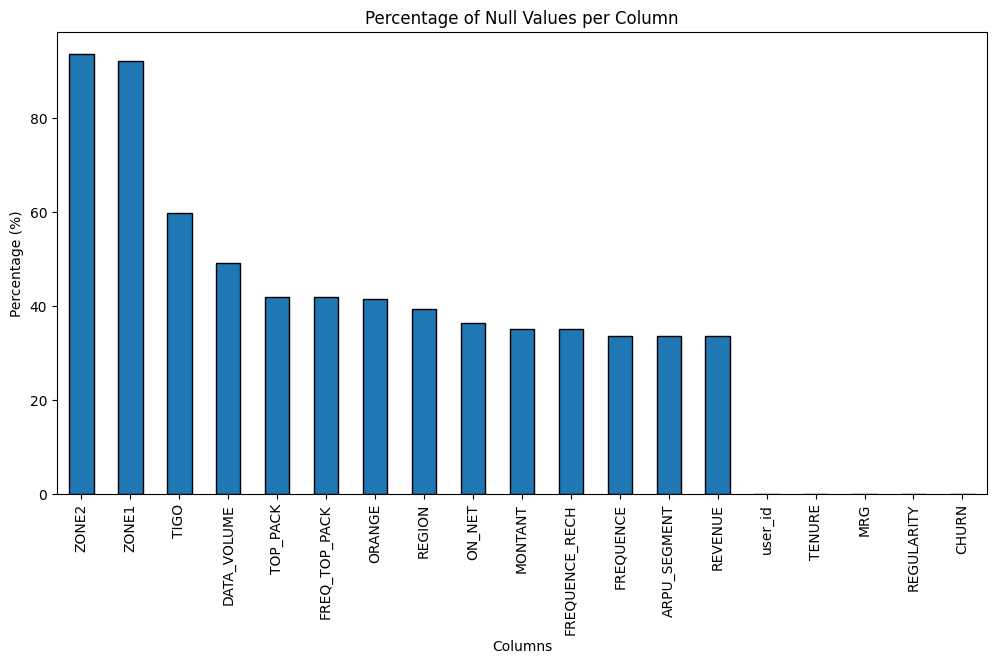

In [41]:
null_percentage = (train_data.isnull().sum().sort_values(ascending=False) / len(train_data)) * 100

 
plt.figure(figsize=(12,6))
null_percentage.plot(kind='bar', edgecolor='black')
plt.title("Percentage of Null Values per Column")
plt.ylabel("Percentage (%)")
plt.xlabel("Columns")
plt.xticks(rotation=90)
plt.show()

In [42]:
train_data['CHURN'].value_counts()

CHURN
0    1750062
1     403986
Name: count, dtype: int64

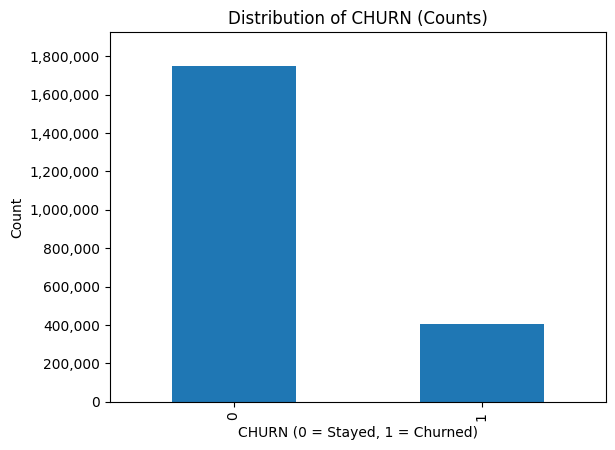

In [43]:
counts = train_data['CHURN'].value_counts()
ax = counts.plot(kind='bar')

plt.title("Distribution of CHURN (Counts)")
plt.xlabel("CHURN (0 = Stayed, 1 = Churned)")
plt.ylabel("Count")
max_count = counts.max()
plt.ylim(0, max_count * 1.1) 
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
# Format y-axis to show full numbers instead of scientific notation
ax.yaxis.set_major_formatter(StrMethodFormatter('{x:,.0f}'))

plt.show()


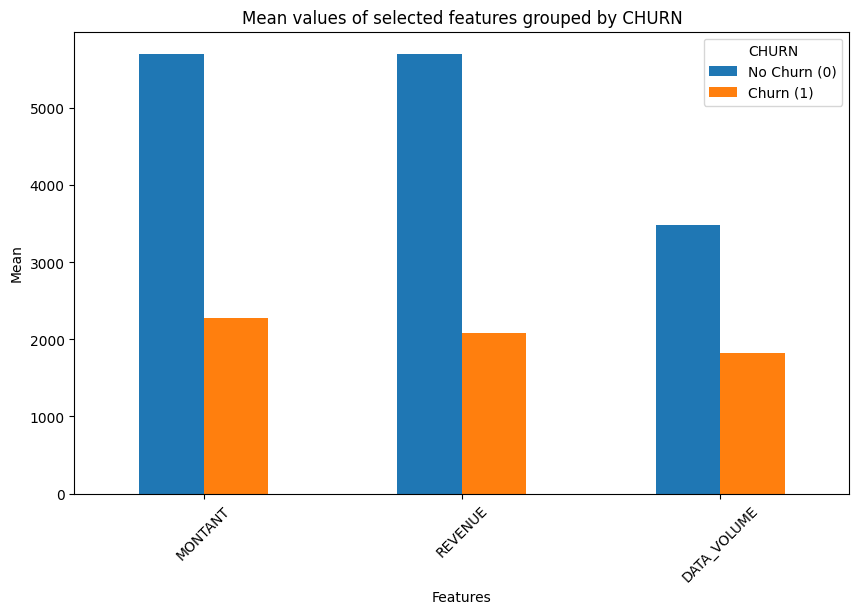

In [44]:
selected_cols = ['MONTANT',  'REVENUE',"DATA_VOLUME", ]

mean_values = train_data[selected_cols].groupby(train_data['CHURN']).mean().T

mean_values.plot(kind='bar', figsize=(10,6))
plt.title("Mean values of selected features grouped by CHURN")
plt.ylabel("Mean")
plt.xlabel("Features")
plt.legend(title="CHURN", labels=["No Churn (0)", "Churn (1)"])
plt.xticks(rotation=45)
plt.show()

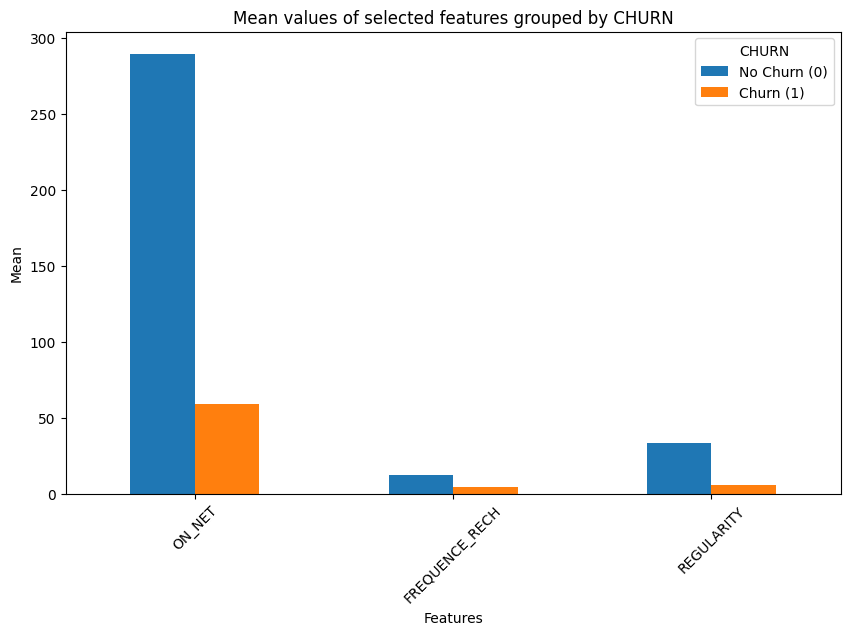

In [45]:
 
selected_cols = [ "ON_NET" ,'FREQUENCE_RECH' ,"REGULARITY"]

mean_values = train_data[selected_cols].groupby(train_data['CHURN']).mean().T

mean_values.plot(kind='bar', figsize=(10,6))
plt.title("Mean values of selected features grouped by CHURN")
plt.ylabel("Mean")
plt.xlabel("Features")
plt.legend(title="CHURN", labels=["No Churn (0)", "Churn (1)"])
plt.xticks(rotation=45)
plt.show()

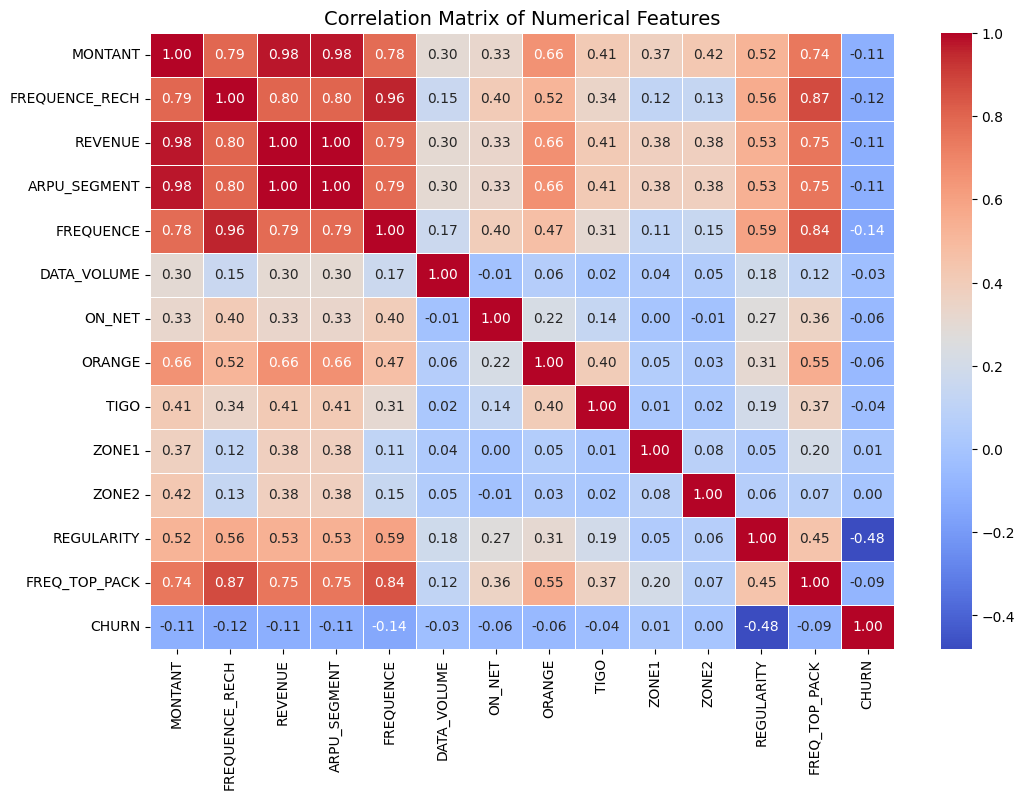

In [46]:
 
num_df = train_data.select_dtypes(include=['number'])
 
corr = num_df.corr()
 
plt.figure(figsize=(12,8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix of Numerical Features", fontsize=14)
plt.show()


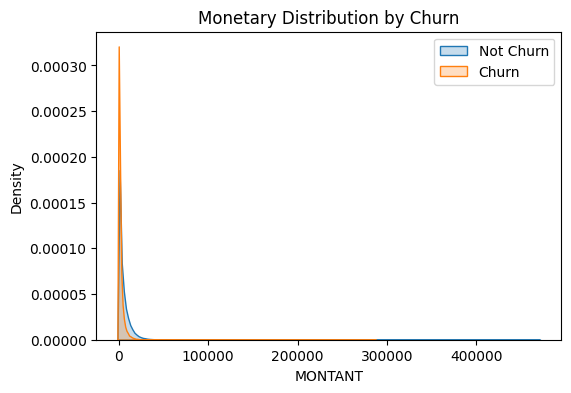

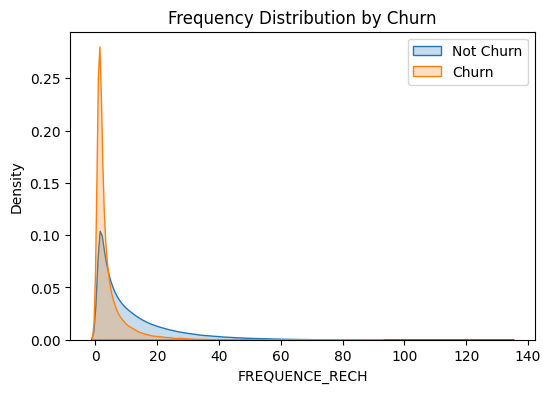

In [47]:
# Monetary
plt.figure(figsize=(6,4))
sns.kdeplot(train_data[train_data['CHURN']==0]['MONTANT'], label='Not Churn', shade=True)
sns.kdeplot(train_data[train_data['CHURN']==1]['MONTANT'], label='Churn', shade=True)
plt.title("Monetary Distribution by Churn")
plt.legend()
plt.show()

# Frequency
plt.figure(figsize=(6,4))
sns.kdeplot(train_data[train_data['CHURN']==0]['FREQUENCE_RECH'], label='Not Churn', shade=True)
sns.kdeplot(train_data[train_data['CHURN']==1]['FREQUENCE_RECH'], label='Churn', shade=True)
plt.title("Frequency Distribution by Churn")
plt.legend()
plt.show()


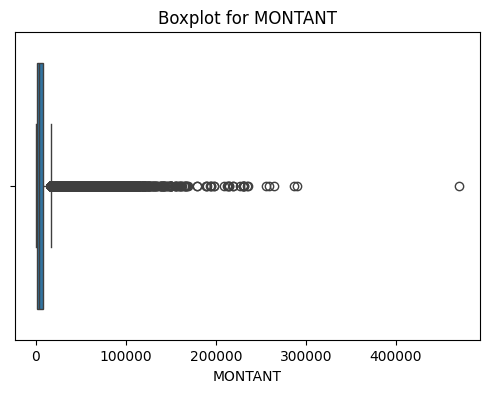

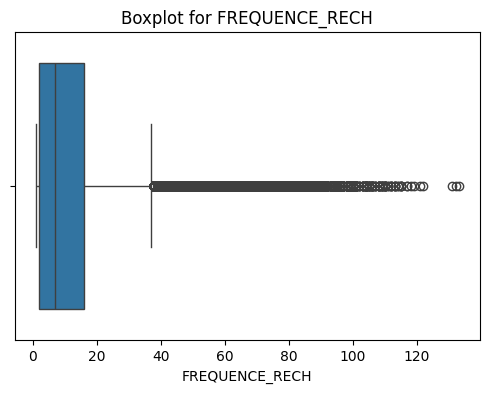

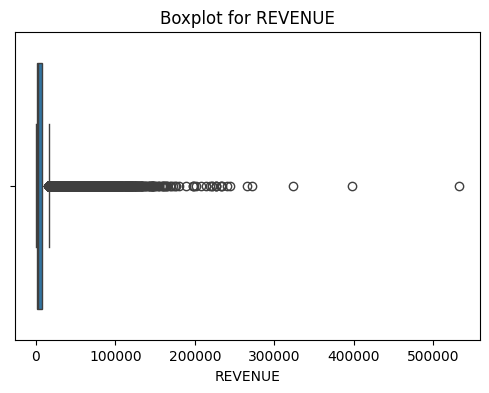

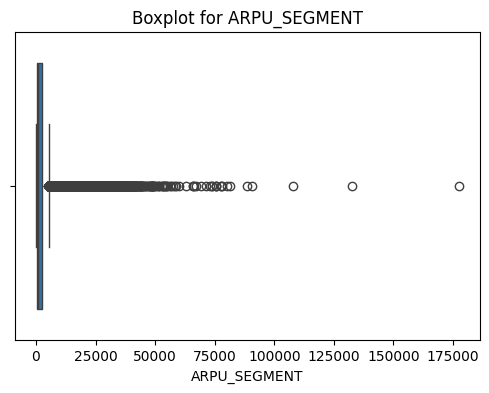

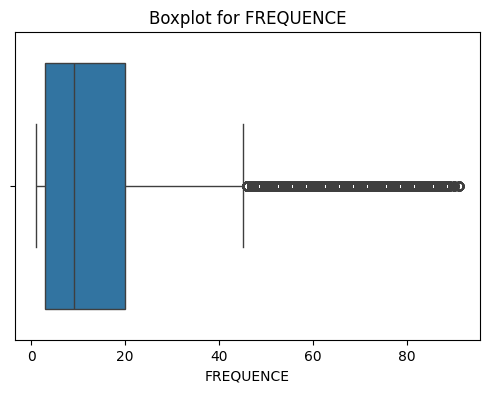

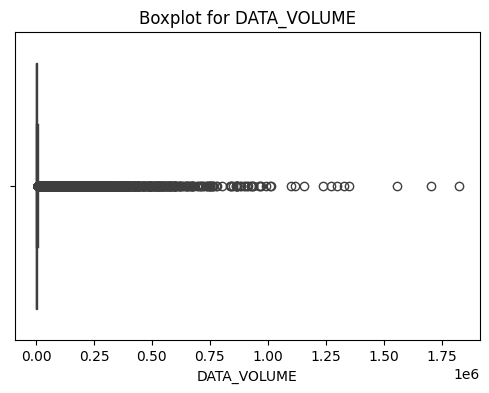

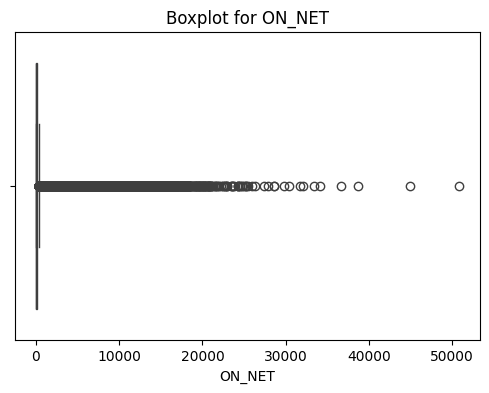

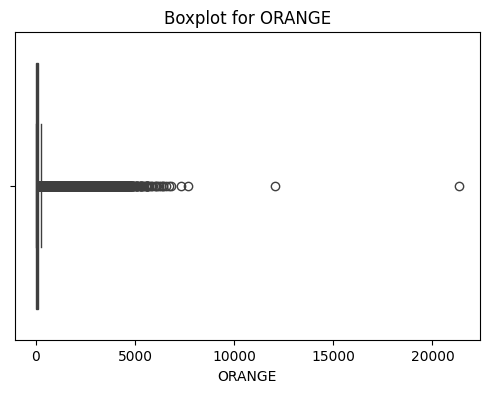

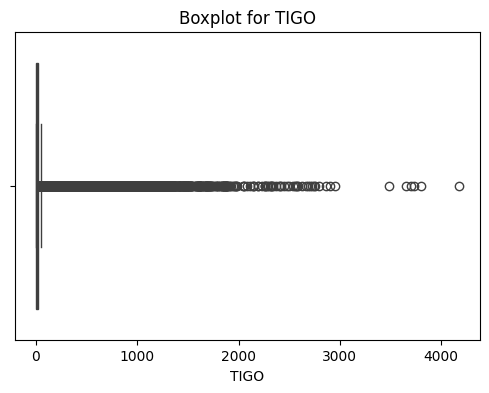

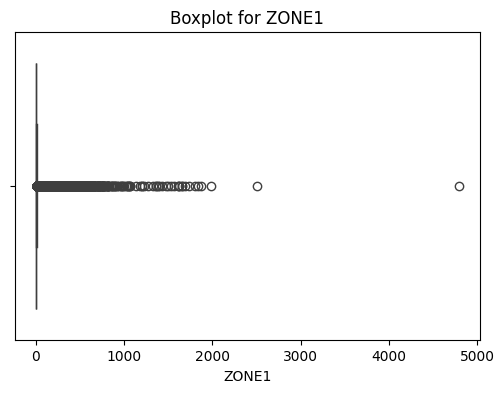

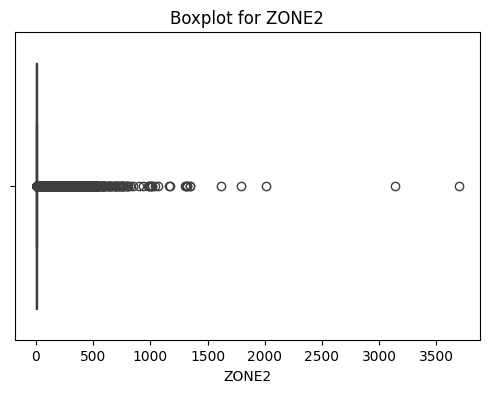

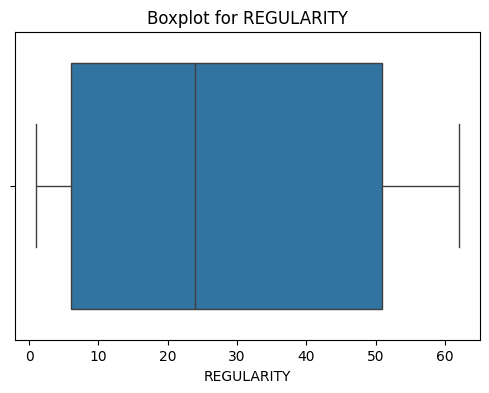

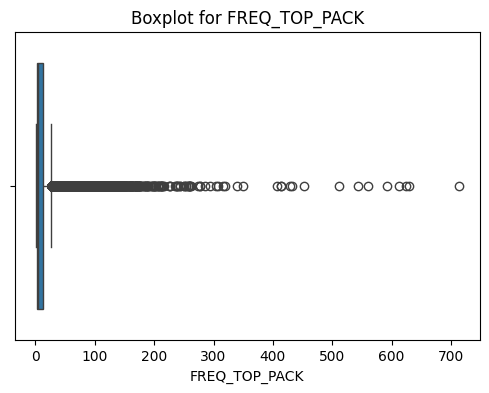

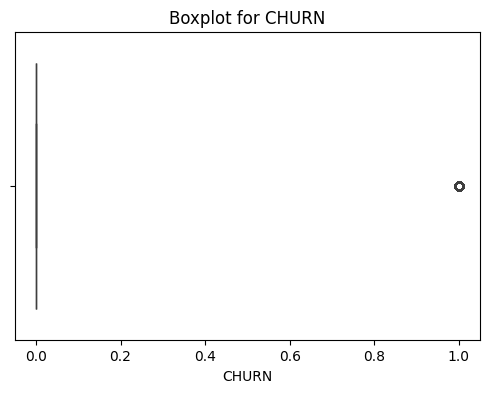

MONTANT:   outliers = 87725
FREQUENCE_RECH:   outliers = 80354
REVENUE:   outliers = 91172
ARPU_SEGMENT:   outliers = 91165
FREQUENCE:   outliers = 69934
DATA_VOLUME:   outliers = 140777
ON_NET:   outliers = 202960
ORANGE:   outliers = 132024
TIGO:   outliers = 100126
ZONE1:   outliers = 26004
ZONE2:   outliers = 16050
REGULARITY:   outliers = 0
FREQ_TOP_PACK:   outliers = 91263
CHURN:   outliers = 403986


In [48]:
 
 
num_cols = train_data.select_dtypes(include=['number']).columns

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(x=train_data[col])
    plt.title(f"Boxplot for {col}")
    plt.show()

 
for col in num_cols:
    Q1 = train_data[col].quantile(0.25)
    Q3 = train_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    outliers = train_data[(train_data[col] < lower) | (train_data[col] > upper)]
    print(f"{col}:   outliers = {len(outliers)}")


In [49]:
train_data.duplicated().sum()

np.int64(0)

In [50]:
cat_cols = train_data.select_dtypes(include=['object', 'category']).columns

for col in cat_cols:
    print(f"\n--- {col} ---")
    print(train_data[col].value_counts())


--- user_id ---
user_id
ffff54079880e00af686f7d6403dd506c9560430    1
ffff531b14420c02c12d106f0087aa1ad5387920    1
ffff4c74d128670312b06340668768227306c387    1
ffff454aff54bd87f84c7edd4d324acdbbd09b05    1
ffff3e920cf98d3118c7992fdb6b41dc072f15fa    1
                                           ..
000028d9e13a595abe061f9b58f3d76ab907850f    1
00001dd6fa45f7ba044bd5d84937be464ce78ac2    1
00001654a9d9f96303d9969d0a4a851714a4bb57    1
00000cb4a5d760de88fecb38e2f71b7bec52e834    1
00000bfd7d50f01092811bc0c8d7b0d6fe7c3596    1
Name: count, Length: 2154048, dtype: int64

--- REGION ---
REGION
DAKAR          513271
THIES          180052
SAINT-LOUIS    119886
LOUGA           99053
KAOLACK         96986
DIOURBEL        66911
TAMBACOUNDA     55074
KAFFRINE        43963
KOLDA           38743
FATICK          35643
MATAM           29083
ZIGUINCHOR      21945
SEDHIOU          3119
KEDOUGOU         1020
Name: count, dtype: int64

--- TENURE ---
TENURE
K > 24 month     2043201
I 18-21 month      45

## EDA Summary - Main Issues

1. **Missing Values**

   - Columns with many NaNs: `REGION`, `TENURE`, `MONTANT`, `REVENUE`, `DATA_VOLUME`, `ZONE1`, `ZONE2`, `TOP_PACK`.

2. **Outliers**

   - Extreme values in `MONTANT`, `REVENUE`, `DATA_VOLUME`, `ON_NET`, `ORANGE`, `TIGO`.

3. **Imbalanced Target**

   - `CHURN=0` ≈ 81%, `CHURN=1` ≈ 19%.

4. **Irrelevant / Constant Features**

   - `user_id` (ID only), `MRG` (constant "NO").

5. **Categorical Issues**

   - `TENURE` in text format (e.g., "K > 24 month").
   - `TOP_PACK` high cardinality (~140 levels, many rare).
   - `REGION` has NaNs.

6. **Zero-Inflated Features**

   - Mostly zeros in `ZONE1`, `ZONE2`, `DATA_VOLUME`.

7. **High Correlation / Leakage Risk**

   - `MONTANT` and `REVENUE` highly correlated.

8. **Scaling & Distribution**
   - Many skewed numerical features → may need log/robust scaling.


# \*\*Data Preprocessing & Cleaning


In [51]:
# ====== ClipTransformer for numerical columns using indices ======
class ClipTransformer(BaseEstimator, TransformerMixin):
    """Clip numerical columns at 1st and 99th percentile using column indices"""
    def __init__(self, cols_idx=None):
        self.cols_idx = cols_idx
        self.lower = {}
        self.upper = {}
        
    def fit(self, X, y=None):
        for idx in self.cols_idx:
            self.lower[idx] = np.percentile(X[:, idx], 1)
            self.upper[idx] = np.percentile(X[:, idx], 99)
        return self
    
    def transform(self, X):
        X = X.copy()
        for idx in self.cols_idx:
            X[:, idx] = np.clip(X[:, idx], self.lower[idx], self.upper[idx])
        return X

In [52]:

# ====== Frequency Encoder for high-cardinality categorical columns ======
class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        # X يكون numpy array: احسب تردد كل عمود
        self.freq_dicts = []
        for i in range(X.shape[1]):
            vals, counts = np.unique(X[:, i], return_counts=True)
            freq = dict(zip(vals, counts / X.shape[0]))
            self.freq_dicts.append(freq)
        return self

    def transform(self, X):
        X = X.copy()
        for i in range(X.shape[1]):
            freq = self.freq_dicts[i]
            # استبدل كل قيمة بترددها، القيم المجهولة تصبح 0
            X[:, i] = np.array([freq.get(v, 0) for v in X[:, i]])
        return X.astype(float)


In [53]:

class FeatureEngineer(BaseEstimator, TransformerMixin):
    def fit(self, X, y=None):
        return self
    
    def transform(self, X):
        X = X.copy()
        # نفترض X[:,0] = FREQUENCE_RECH و X[:,1] = REVENUE
        X = np.hstack([X, (X[:,0] / (X[:,1] + 1)).reshape(-1,1)])  # إضافة العمود الجديد
        return X




In [54]:
def tenure_mapper(X):
    mapping = {
        "D 3-6 month": 1,
        "E 6-9 month": 2,
        "F 9-12 month": 3,
        "G 12-15 month": 4,
        "H 15-18 month": 5,
        "I 18-21 month": 6,
        "J 21-24 month": 7,
        "K > 24 month": 8
    }
    # إذا X numpy array
    X_mapped = np.vectorize(lambda x: mapping.get(x, np.nan))(X)
    return X_mapped.astype(float)



In [55]:
 
# ====== Column lists ======
drop_cols = ["ZONE1", "ZONE2","MRG","ARPU_SEGMENT","MONTANT"]   
num_cols = [ "FREQUENCE_RECH", "REVENUE", "FREQUENCE", 
            "DATA_VOLUME", "ON_NET", "ORANGE", "TIGO",  
            "REGULARITY", "FREQ_TOP_PACK"]
cat_cols_low = ["REGION"]
cat_cols_high = ["TOP_PACK"]
tenure_col = ["TENURE"]
target_col = "CHURN"

In [56]:
# ====== Pipelines ======
# Tenure pipeline
tenure_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("mapper", FunctionTransformer(tenure_mapper))
])

# Numerical pipeline
num_clip_idx = [num_cols.index("DATA_VOLUME"), num_cols.index("REVENUE")]

num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("clip", ClipTransformer(cols_idx=num_clip_idx)),
    ("scaler", RobustScaler())
])

# Low-cardinality categorical
cat_low_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown="ignore"))
])

# High-cardinality categorical
cat_high_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("freq_enc", FrequencyEncoder())
])

# Feature engineering pipeline
feat_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy="median")),   
    ("feat_eng", FeatureEngineer())                  
])

# Full preprocessor
preprocessor = ColumnTransformer(transformers=[
    ("num", num_pipeline, num_cols),
    ("tenure", tenure_pipeline, tenure_col),
    ("cat_low", cat_low_pipeline, cat_cols_low),
    ("cat_high", cat_high_pipeline, cat_cols_high),
    ("feat_eng", feat_pipeline, ["FREQUENCE_RECH","REVENUE"])
])

best_params = {
    "n_estimators": 500,
    "criterion": "gini",
    "max_depth": 19,
    "min_samples_split": 8,
    "min_samples_leaf": 3,
    "min_weight_fraction_leaf": 0.0,
    "max_features": "sqrt",
    "max_leaf_nodes": None,
    "min_impurity_decrease": 0.0,
    "bootstrap": True,
    "oob_score": False,
    "n_jobs": -1,
    "random_state": 42,
    "verbose": 1,
    "warm_start": False,
    "class_weight": "balanced",
    "ccp_alpha": 0.0,
    "max_samples": None,
    "monotonic_cst": None
}
# ====== Classifier pipeline ======
from sklearn.linear_model import LogisticRegression

clf = ImbPipeline(steps=[
    ("preprocessor", preprocessor),
    ("smote", SMOTE(random_state=42)),
    ("classifier", LogisticRegression(
        random_state=42,
        max_iter=1000,
        class_weight="balanced",   # handle imbalance
        solver="liblinear",        # works well with small/medium datasets + imbalance
        penalty="l2",
        C=1.0                      # can tune this (higher → less regularization)
    ))
])

In [57]:
# ====== Train/Test split ======
X_train_full = train_data.drop(columns=[target_col] + drop_cols)
y_train_full = train_data[target_col]
X_test = test_data.drop(columns=drop_cols)

X_tr, X_val, y_tr, y_val = train_test_split(
    X_train_full, y_train_full, test_size=0.2, random_state=42, stratify=y_train_full
)

 

In [58]:
# ====== Fit classifier ======
clf.fit(X_tr, y_tr)

,steps,"[('preprocessor', ...), ('smote', ...), ...]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('num', ...), ('tenure', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [59]:
 
# ====== Predict on validation ======
y_val_proba = clf.predict(X_val) 
auc_score = roc_auc_score(y_val, y_val_proba)
print(f"AUC validation: {auc_score:.4f}") 

AUC validation: 0.8360


In [60]:
# ====== Predict on test ======
y_test_pred = clf.predict(X_test)  


In [61]:
submission = pd.DataFrame({
    "user_id": test_data["user_id"],
    "CHURN": y_test_pred
})
submission.to_csv("submission.csv", index=False)
print(" submission.csv ")

 submission.csv 


In [62]:


# ====== حفظ الموديل ======
joblib.dump(clf, "expresso_churn_model.pkl")
print("تم حفظ الموديل بنجاح في expresso_churn_model.pkl")

# ====== تحميل الموديل لاحقاً ======
loaded_model = joblib.load("expresso_churn_model.pkl")

 


تم حفظ الموديل بنجاح في expresso_churn_model.pkl
